# **Heart Disease**





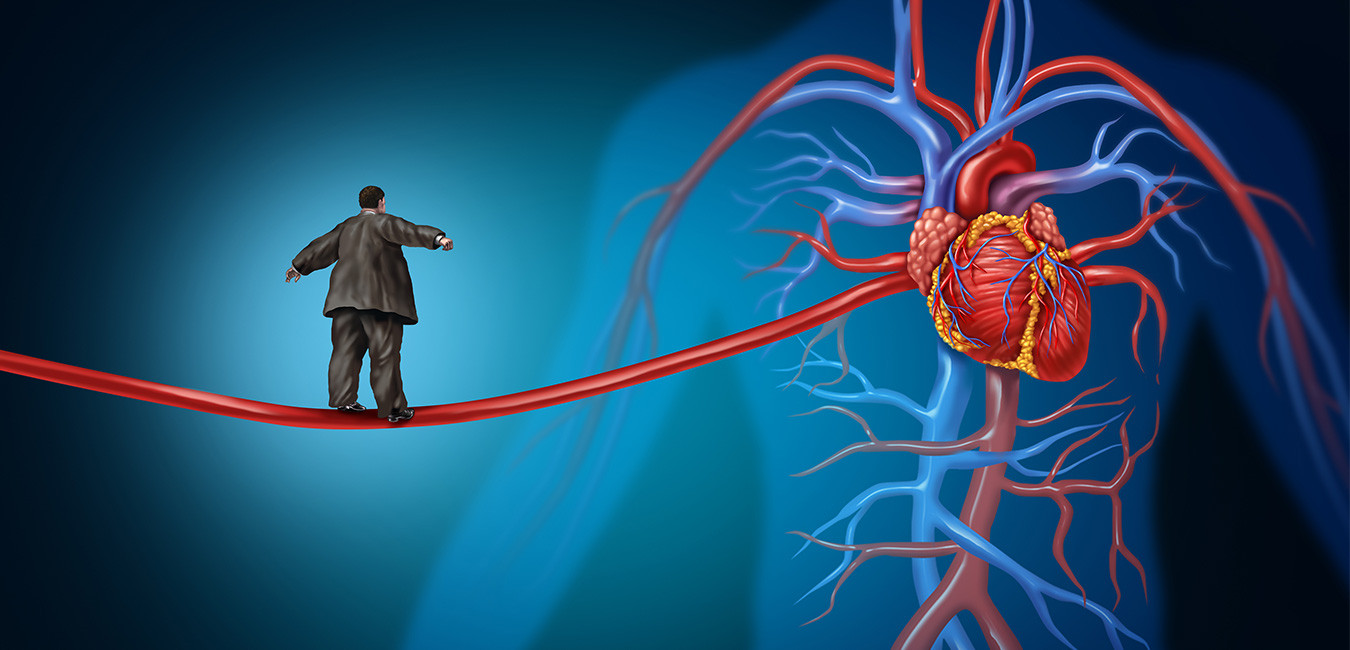

Count till 40 seconds ⏰. In those exact 40 seconds, somebody experienced a heart attack.

**Heart disease** describes a range of conditions that affect your heart. Today, heart disease is the leading cause of death worldwide with 17.9 million deaths per year, according to reports from the World Health Organization [1](https://www.who.int/health-topics/cardiovascular-diseases/#tab=tab_1). However, **what if we could fix that number? **To answer this, let's take a look at how cardiovascular disease is currently diagnosed. In recent years, researchers have discovered or proposed new risk factors for CVD depending on lifestyle [2](https://pubmed.ncbi.nlm.nih.gov/30646282/); blood testing ; electrocardiograms [3](https://pubmed.ncbi.nlm.nih.gov/26046742/); medical imaging [4](https://pubmed.ncbi.nlm.nih.gov/27687192/); genetic, genomic and proteomic biomarkers [5](https://pubmed.ncbi.nlm.nih.gov/27298828/); as well as the microbe and gene-environment interactions [6](https://pubmed.ncbi.nlm.nih.gov/27095829/). However, the equipment required for these techniques costs the hospital a lot of money, and more than 50% of these tests are used on patients who are not actually in pain. of no cardiovascular disease.

Back to our original question, how do we reduce 17.9 million to a lower number? The fast, efficient and reliable way to solve this problem is: artificial intelligence or more precisely **machine learning**.

Many studies have been performed and various machine learning models are used for doing the classification and prediction for the diagnosis of heart disease. An automatic classifier for detecting congestive heart failure shows the patients at high risk and the patients at low risk by Melillo et al. [7](https://pubmed.ncbi.nlm.nih.gov/24592473/); they used machine learning algorithm as CART which stands for Classification and Regression in which sensitivity is achieved as 93.3 percent and specificity is achieved as 63.5 percent. Then for improving the performance electrocardiogram (ECG) approach is suggested by Rahhal et al. [8](https://www.sciencedirect.com/science/article/abs/pii/S0020025516300184?via%3Dihub) in which deep neural networks are used for choosing the best features and then using them.And there are other efforts that were made to have more robust models with a high presicion [9](https://pubmed.ncbi.nlm.nih.gov/30034925/),[10](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8266441/#B1) , [11](https://research.ijais.org/volume3/number7/ijais12-450593.pdf).

In this work, we will try to apply the **Random Forest Classifier** on Heart Disease data. This dataset gives a number of variables as well as a target condition of whether or not to have heart disease. Below, we determine the different variables that exist in the data :


**Attribute Information:**
*   age
*   sex
*   chest pain type (4 values)
*   resting blood pressure
*   serum cholestoral in mg/dl
*   fasting blood sugar > 120 mg/dl
*   resting electrocardiographic results (values 0,1,2)
*   maximum heart rate achieved
*   exercise induced angina
*   oldpeak = ST depression induced by exercise relative to rest
*   the slope of the peak exercise ST segment
*   number of major vessels (0-3) colored by flourosopy
*   thal: 3 = normal; 6 = fixed defect; 7 = reversable defect



In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Step 0 : Import the data :**

In [ ]:
#import the data
df = pd.read_csv("https://raw.githubusercontent.com/FZ-hajji/ML_Project/main/heart_data.csv")
df.columns=['Age', 'Gender', 'CP', 'Trestbps', 'Chol', 'FBS', 'RestECG',
                 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'CA', 'Thal', 'target']
df.head(20)


,Age,Gender,CP,Trestbps,Chol,FBS,RestECG,Thalach,Exang,Oldpeak,Slope,CA,Thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

# **Step 1 : Data Processing and Visualisation :**

**Missing values :**

In [ ]:
#Count the empty values in each column 
df.isna().sum()


Age         0
Gender      0
CP          0
Trestbps    0
Chol        0
FBS         0
RestECG     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
CA          0
Thal        0
target      0
dtype: int64

In [ ]:
#Another way to check for any null or missing values
df.isnull().values.any()


False

**Data Exploration :**

In [ ]:
df.describe()

,Age,Gender,CP,Trestbps,Chol,FBS,RestECG,Thalach,Exang,Oldpeak,Slope,CA,Thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Count the number of indviiduals with a heart disease and without
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

**Visualisation data :**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


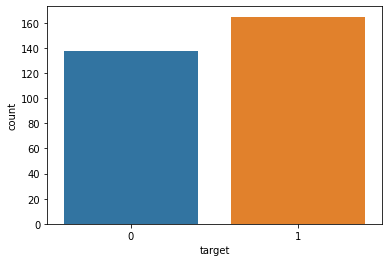

In [ ]:
#visualize the count (who has heart disease who doesn't)
sns.countplot(df['target'])

In [ ]:
target_0=len(df[(df.target==0)])
target_1=len(df[(df.target==1)])

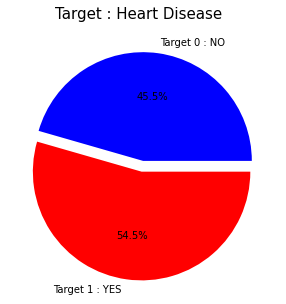

In [ ]:
colors = ['blue','red']
explode = [0,0.1]
plt.figure(figsize = (5,5))
plt.pie([target_0,target_1], explode=explode,labels=['Target 0 : NO ','Target 1 : YES '],  colors=colors, autopct='%1.1f%%')
plt.title('Target : Heart Disease  ',fontsize = 15)
plt.show()

**Splitting the Data :**

In [58]:
#we are going to split the training data into 80%, and the test data as 20%.
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values 
Y = df.iloc[:,-1].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=47)





**Feature Scaling :**

Feature scaling is used in the pre-processing stage, and is a very crucial part to assure the model provides accurate results. Essentially, it is responsible for evening out the data to make sure all the weights and biases applied are the same. Without feature scaling, columns with high magnitude will weigh a lot more than the features which have low magnitudes. This could severely modify the results.

In [59]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Step 2 : Choose Model**

Firstly, we will use the Decision trees algorithm then we will compare it with Random forest algorithm .

**DECISION TREE :**

In [85]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import accuracy_score
Model_tree = DecisionTreeClassifier(random_state=42)
Model_tree = Model_tree.fit(X_train, Y_train)

In [86]:
Model_tree.score(X_train, Y_train)

1.0

**Confusion Matrix**

Confusion matrix gives a more in-depth evaluation of the performance of our machine learning module. It gives us an idea of the number of predictions our model is getting right and the errors it is making.

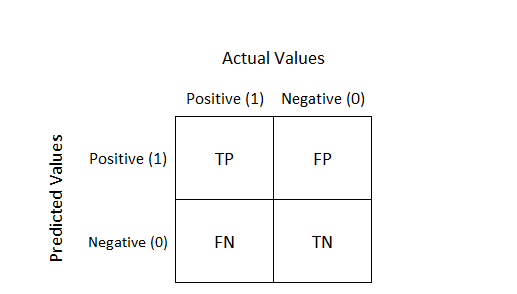



*   True Positives (TP): cases in which the predictive value is true-they do have a CVD (indicated by 1), and the actual value is also true-they do have a CVD.
*  True Negatives (TN): cases in which the predicted value is false- they don’t have a CVD, and the actual value is false as well- they don’t have a CVD.
*   False Positives (FP): cases in which the predicted value is true-they do have a CVD, but the actual value is false- they don’t have a CVD.
*   False Negatives (FN): cases in which the predicted value is false-they don’t have a CVD, but the actual value is true- they do have a CVD.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


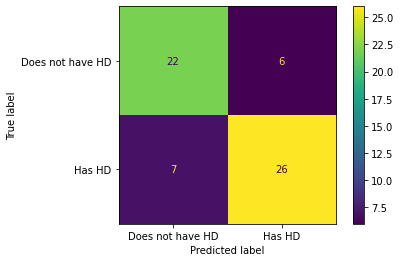

In [13]:
plot_confusion_matrix(Model_tree, X_test, Y_test, display_labels=["Does not have HD", "Has HD"])

In [14]:
cm = confusion_matrix(Y_test,Model_tree.predict(X_test))
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
#Print the confusion matrix
print(cm)
print('Model Test Accuracy = {}'.format((TP+TN)/(TP+TN+FN+FP)))

[[22  6]
 [ 7 26]]
Model Test Accuracy = 0.7868852459016393


**ccp_alphas** (non-negative float, default=0.0) :
Complexity parameter used for Minimal Cost-Complexity Pruning  [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Indeed, pruning with minimal complexity cost is an algorithm used to prune a tree in order to avoid overfitting.[ Minimal Cost-Complexity Pruning](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning)

In [15]:
path = Model_tree.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]

Models_tree = []
for ccp_alpha in ccp_alphas:
    Model_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    Model_tree.fit(X_train, Y_train)
    Models_tree.append(Model_tree)

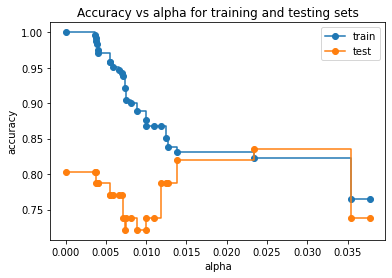

In [16]:
train_scores = [Model_tree.score(X_train, Y_train) for Model_tree in Models_tree]
test_scores = [Model_tree.score(X_test, Y_test) for Model_tree in Models_tree]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()


In [87]:
Model_tree_pruned = DecisionTreeClassifier(random_state=42, 
                                       ccp_alpha=0.0225)
Model_tree_pruned = Model_tree_pruned.fit(X_train, Y_train) 

In [88]:
Model_tree_pruned.score(X_train, Y_train)

0.8305785123966942

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


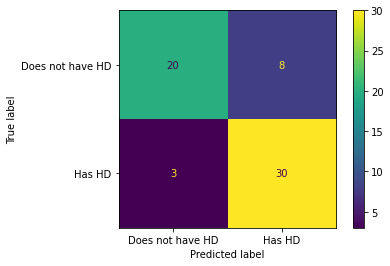

In [18]:
plot_confusion_matrix(Model_tree_pruned, 
                      X_test, 
                      Y_test, 
                      display_labels=["Does not have HD", "Has HD"])

In [19]:
cm1 = confusion_matrix(Y_test,Model_tree_pruned.predict(X_test))
TN1 = cm1[0][0]
TP1 = cm1[1][1]
FN1 = cm1[1][0]
FP1 = cm1[0][1]
#Print the confusion matrix
print(cm)
print('Model Test Accuracy = {}'.format((TP1+TN1)/(TP1+TN1+FN1+FP1)))

[[22  6]
 [ 7 26]]
Model Test Accuracy = 0.819672131147541


**Random Forest :**



In [20]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state=1)
forest.fit(X_train, Y_train)
model = forest
model.score(X_train, Y_train)

0.9752066115702479

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,model.predict(X_test))
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
#Print the confusion matrix
print(cm)
print('Model Test Accuracy = {}'.format((TP+TN)/(TP+TN+FN+FP)))

[[22  6]
 [ 6 27]]
Model Test Accuracy = 0.8032786885245902


To improve the Random Forest model performance, we can detect the variables which have minimal contribution in the classification using **model.feature_importances_** and then we remove them.

In [27]:
X_train2= pd.DataFrame(X_train)
X_train2.columns=['Age', 'Gender', 'CP', 'Trestbps', 'Chol', 'FBS', 'RestECG',
                 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'CA', 'Thal']
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train2.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Thal,0.165443
Age,0.123529
Oldpeak,0.112853
Thalach,0.109921
CA,0.095477
Trestbps,0.089269
CP,0.087562
Chol,0.065819
Slope,0.050219
Exang,0.045951


We notice that **FBS** has a very minimal contribution .But almost all variables contribute in a balanced way to our classification.So we try to remove wthe FBS variable and see what will happen :

In [30]:
df1=df.copy()
df1.drop(["FBS"], axis=1, inplace=True)
df1

,Age,Gender,CP,Trestbps,Chol,RestECG,Thalach,Exang,Oldpeak,Slope,CA,Thal,target
0,63,1,3,145,233,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,1,115,1,1.2,1,1,3,0


In [71]:
#Splitting the Data :
#we are going to split the training data into 80%, and the test data as 20%.
from sklearn.model_selection import train_test_split
X1 = df1.iloc[:,:-1].values 
Y1 = df1.iloc[:,-1].values
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1,Y1, test_size = 0.20, random_state=47)
#Feature Scaling :
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1= sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)


In [72]:
#New Random forest Model:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state=1)
forest.fit(X_train1, Y_train1)
model = forest
model.score(X_train1, Y_train1)



0.9834710743801653

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test1,model.predict(X_test1))
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
#Print the confusion matrix
print(cm)
print('Model Test Accuracy = {}'.format((TP+TN)/(TP+TN+FN+FP)))

[[19  9]
 [ 7 26]]
Model Test Accuracy = 0.7377049180327869


So we notice here that the train score is a little improved but the test score is reduced which is not good, but we must tune the hyper-parameters in both cases to make a final decision.

**Tuning  hyper-parameters :**

**Case 1: FBS removed**

In [60]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 100, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

**GridSearch**

In [61]:
from sklearn.model_selection import GridSearchCV
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [62]:
rf_Model = RandomForestClassifier()

In [63]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid,cv = 10, verbose=2, n_jobs = 4)

In [74]:
rf_Grid.fit(X_train1, Y_train1)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [5, 28, 52, 76, 100]},
             verbose=2)

In [75]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 52}

In [78]:
print (f'Train Accuracy - : {rf_Grid.score(X_train1,Y_train1):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test1,Y_test1):.3f}')

Train Accuracy - : 0.868
Test Accuracy - : 0.803


**RandomizedSearch**

In [67]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [79]:
rf_RandomGrid.fit(X_train1, Y_train1)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [5, 28, 52, 76, 100]},
                   verbose=2)

In [69]:
rf_RandomGrid.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 76}

In [80]:
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train1,Y_train1):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test1,Y_test1):.3f}')

Train Accuracy - : 0.909
Test Accuracy - : 0.836


**Case 2: FBS not removed**

**GridSearchCV :**

In [81]:
rf_Grid.fit(X_train, Y_train)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [5, 28, 52, 76, 100]},
             verbose=2)

In [82]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,Y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,Y_test):.3f}')

Train Accuracy - : 0.913
Test Accuracy - : 0.820


**RandomGrid :**

In [83]:
rf_RandomGrid.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [5, 28, 52, 76, 100]},
                   verbose=2)

In [84]:
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,Y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,Y_test):.3f}')

Train Accuracy - : 0.921
Test Accuracy - : 0.787


We can summarize the results of the scores we obtained for the different models in the table below :

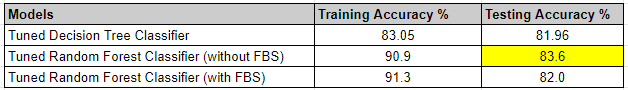



*   So the right decision is to delete the FBS variable since we obtained in this case the highest testing score




Using the **Random Forest Classifier**, we are able to detect cardiovascular disease with an accuracy of 83.6%. This is decent accuracy, however, since this model deals with the lives of patients, it needs to be improved to come very close to 100% accuracy.
Some ways to improve this model are to feed it with more data, create a **Neural Network** incorporating multiple algorithms, using methods such as feature prediction modeling to handle missing values ​​in the dataset. 

Let's go back to our original question once again. Currently, 17.9 million people die of CVD per year, how to reduce this number? Well, by using this kind of model to detect CVD early on, we can save around 161,637,000 lives. The intersection of health and machine learning really has a lot of potential even if it encounters some difficulties but it remains interesting to use AI in health or even in biology because this field is very complex and to have a tool that allows to understand this complexity is going to be useful even if we get mediocre or decent results for the first time, but we can always seek to improve our models ad infinitum 🌝 !